Text(0, 0.5, 'Max/Min temp')

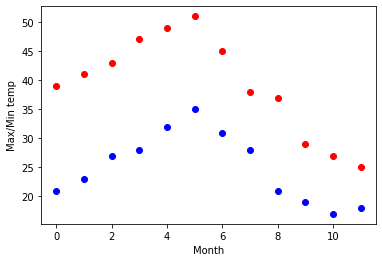

In [3]:
#q1
import numpy as np
import matplotlib.pyplot as plt
max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(12)
plt.plot(months,max,"ro")
plt.plot(months,min,"bo")
plt.xlabel("Month")
plt.ylabel("Max/Min temp")

In [6]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,max, [40, 20,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,min, [-40, 20,0])
print(res_max)
print(res_min)

[ 39.88861733 -10.59083162   1.33370157]
[25.55626462 -7.74472963  0.93101294]


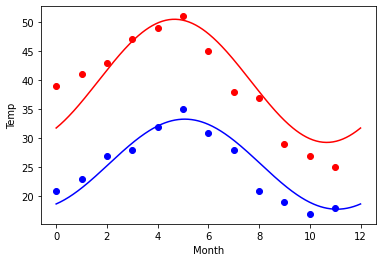

In [8]:
#q2
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temp')

plt.show()

In [18]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
count=(data["sex"].value_counts()/len(data))*100
df=pd.DataFrame(count)
df

,sex
male,64.351145
female,35.572519


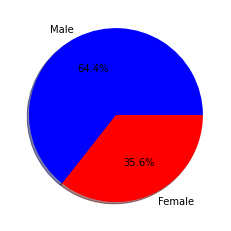

In [20]:
labels=["Male","Female"]
size=data.sex.value_counts()
fig1,ax1=plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%', shadow=True, colors = ['Blue','Red'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

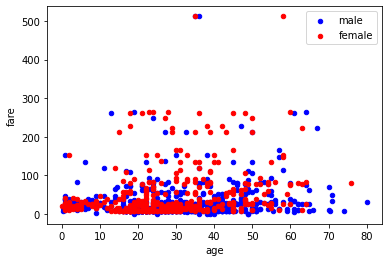

In [23]:
plt.figure()
category1 = data[data.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male')
data[data.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)